In [1]:
# import dependencies
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#!pip install catboost
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,accuracy_score, precision_score, recall_score, f1_score
import graphviz
from tabulate import tabulate
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use('fivethirtyeight')
from keras.callbacks import EarlyStopping
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from imblearn.over_sampling import SMOTE
import itertools

<h1 style="color:red;">PREDICTION ANALYSIS</h1>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
training=pd.read_csv("/content/gdrive/My Drive/Python analysis/training.csv")
test=pd.read_csv("/content/gdrive/My Drive/Python analysis/test.csv")
sample_submission=pd.read_csv("/content/gdrive/My Drive/Python analysis/sample_submission.csv")

In [5]:
display(training.info())
display(training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

None

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [6]:
cat_columns = training.select_dtypes(include=['object'])
for column in cat_columns:
    print(f"Value counts for column '{column}':")
    value_counts = training[column].value_counts().head(10)
    total_count = len(training[column])
    data = []
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        data.append([value, count, f"{percentage:.2f}%"])
    headers = ["Value", "Count", "Percentage"]
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print('=' * 50)

Value counts for column 'patient_race':
+----------+-------+------------+
|  Value   | Count | Percentage |
+----------+-------+------------+
|  White   | 3588  |   27.80%   |
|  Black   | 1056  |   8.18%    |
| Hispanic |  829  |   6.42%    |
|  Other   |  683  |   5.29%    |
|  Asian   |  365  |   2.83%    |
+----------+-------+------------+
Value counts for column 'payer_type':
+--------------------+-------+------------+
|       Value        | Count | Percentage |
+--------------------+-------+------------+
|     COMMERCIAL     | 6032  |   46.74%   |
|      MEDICAID      | 2569  |   19.91%   |
| MEDICARE ADVANTAGE | 2502  |   19.39%   |
+--------------------+-------+------------+
Value counts for column 'patient_state':
+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|  CA   | 2438  |   18.89%   |
|  TX   | 1155  |   8.95%    |
|  NY   | 1041  |   8.07%    |
|  MI   |  858  |   6.65%    |
|  IL   |  782  |   6.06%    |
|  OH   |  754  |  

In [7]:
display(test.info());display(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

None

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,Midwest,East North Central,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,11.625806,11.208065,15.619355,12.322581,8.409677,3.343548,49.154839,50.845161,55.175806,13.982258,24.266129,6.583871,3.073226,52.980645,66187.22807,1.611290,1.277419,2.645161,3.853226,3.172581,13.275806,12.633871,21.485484,16.717742,15.238710,8.070968,23.309677,33553.43333,84.112903,2064.741935,152749.5370,825.122449,23.895455,12.429032,40.667742,28.959677,11.895161,6.046774,17.941935,35.591379,63.303226,3.406557,10.655357,5.551786,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C787,NaN,NaN,South,South Atlantic,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,11.302564,10.971795,15.823077,15.902564,11.828205,6.815385,49.658974,50.341026,44.800000,17.779487,29.102564,8.310256,2.917105,46.665789,64711.71053,3.873684,2.044737,3.807895,4.239474,4.242105,9.347368,13.018421,17.373684,12.889474,14.442105,14.702632,29.144737,34678.61538,68.673684,8502.230769,265860.6053,1343.394737,34.957895,8.379487,26.558974,30.200000,22.100000,12.764103,34.864103,43.250000,57.035897,5.002632,11.564103,0.005128,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,572606.5000,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C779,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.6

In [8]:
display(sample_submission.head())

,patient_id,DiagPeriodL90D
0,573710,0.5
1,593679,0.5
2,184532,0.5
3,447383,0.5
4,687972,0.5


In [9]:
print(f"The training set consist of the following shape",training.shape)
print(f"The test set consist of the following shape",test.shape)
print(f"The sample submission set consist of the following shape",sample_submission.shape)

The training set consist of the following shape (12906, 83)
The test set consist of the following shape (5792, 82)
The sample submission set consist of the following shape (5792, 2)


In [10]:
training.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [11]:
training['DiagPeriodL90D'].unique()# The target varible is binary

array([1, 0])

<h2>Data Preparation and Feature Engineering</h2>

#### Dealing with missing data

In [12]:
training.isna().sum()# patient_race, payer_type, bmi, metastatic_first_novel_treatment and metastatic_first_novel_treatment_type

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [13]:
train = training.applymap(lambda x: np.nan if x == 'nan' else x)
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 43292,which is 4.04% of total data.


In [14]:
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
N02 has 29 missing values, which is 0.22% of the column.
income_household_75_to_100 has 4 missing values, which is 0.03% of the column.
income_household_150_over has 4 missing values, which is 0.03% of the column.
income_household_15_to_20 has 4 missing values, which is 0.03% of the column.
income_household_20_t

<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #f4f2f7; font-size: 130%; text-align: left;">

**High Number of missing values:**
   - Notable gaps are observed in columns like `metastatic_first_novel_treatment` and `metastatic_first_novel_treatment_type`, where 99.81% of values are missing.
 - Columns related to demographic and socioeconomic factors, such as `payer_type`, `bmi`, and `family_size`, have missing values ranging from 0.01% to 69.46%.

**Small number of missing:**
   - Housing-related columns like `home_value`, `rent_median`, and economic indicators like `income_household_median` show minimal missing values, ranging from 0.01% to 0.03%.
   - Columns such as `Ozone`, `PM25`, and `N02` display a small proportion of missing values (0.22%), indicating relatively complete environmental data.
   - Essential community characteristics, including `race` and `hispanic` columns, show negligible missing values (0.01%).


In [15]:
missing_info = test.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{test[column].isna().sum()}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 5781 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 5781 missing values, which is 99.81% of the column.
bmi has 4015 missing values, which is 69.32% of the column.
patient_race has 2901 missing values, which is 50.09% of the column.
payer_type has 760 missing values, which is 13.12% of the column.
patient_state has 21 missing values, which is 0.36% of the column.
Region has 21 missing values, which is 0.36% of the column.
Division has 21 missing values, which is 0.36% of the column.
PM25 has 14 missing values, which is 0.24% of the column.
Ozone has 14 missing values, which is 0.24% of the column.
N02 has 14 missing values, which is 0.24% of the column.
income_household_under_5 has 1 missing values, which is 0.02% of the column.
home_ownership has 1 missing values, which is 0.02% of the column.
family_size has 1 missing values, which is 0.02% of the column.
family_dual_income has 1 missing values, which is 0

In [16]:
# Will drop the two features with more 99.81% missing values
train=train.drop(['metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type'],axis=1)
test=test.drop(['metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type'],axis=1)
# Filling missing data for the remaining features
train[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']]=train[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']].fillna(train[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']].mean())

# For categorical values will fill the missing data by its mode
train[['patient_race', 'payer_type', 'patient_state', 'Region', 'Division']].mode()
train['patient_race']=train['patient_race'].fillna(train['patient_race'].mode()[0])
train['payer_type']=train['payer_type'].fillna(train['payer_type'].mode()[0])
train['patient_state']=train['patient_state'].fillna(train['patient_state'].mode()[0])
train['Region']=train['Region'].fillna(train['Region'].mode()[0])
train['Division']=train['Division'].fillna(train['Division'].mode()[0])

# **************************************************************************************************************************
test[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']]=test[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']].fillna(test[['bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']].mean())

# For categorical values will fill the missing data by its mode
test[['patient_race', 'payer_type', 'patient_state', 'Region', 'Division']].mode()
test['patient_race']=test['patient_race'].fillna(test['patient_race'].mode()[0])
test['payer_type']=test['payer_type'].fillna(test['payer_type'].mode()[0])
test['patient_state']=test['patient_state'].fillna(test['patient_state'].mode()[0])
test['Region']=test['Region'].fillna(test['Region'].mode()[0])
test['Division']=test['Division'].fillna(test['Division'].mode()[0])

In [17]:
num_columns = train.select_dtypes(exclude=['object'])
cat_columns = train.select_dtypes(include=['object'])
display(num_columns.isna().sum())
display(cat_columns.isna().sum())

patient_id                     0
patient_zip3                   0
patient_age                    0
bmi                            0
population                     0
density                        0
age_median                     0
age_under_10                   0
age_10_to_19                   0
age_20s                        0
age_30s                        0
age_40s                        0
age_50s                        0
age_60s                        0
age_70s                        0
age_over_80                    0
male                           0
female                         0
married                        0
divorced                       0
never_married                  0
widowed                        0
family_size                    0
family_dual_income             0
income_household_median        0
income_household_under_5       0
income_household_5_to_10       0
income_household_10_to_15      0
income_household_15_to_20      0
income_household_20_to_25      0
income_hou

patient_race                        0
payer_type                          0
patient_state                       0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
Region                              0
Division                            0
dtype: int64

In [18]:
# Checking for duplicate records
print(' Total duplicates in the data are:', train.duplicated().sum())

 Total duplicates in the data are: 0


### Feature engineering

In [19]:
train.drop(["patient_id","patient_zip3"],axis=1,inplace=True)# We wont be needing the ID for analysis
ID=test["patient_id"]
ivtable=pd.DataFrame(train.columns,columns=['variable'])
ivtable

,variable
0,patient_race
1,payer_type
2,patient_state
3,patient_age
4,patient_gender
5,bmi
6,breast_cancer_diagnosis_code
7,breast_cancer_diagnosis_desc
8,metastatic_cancer_diagnosis_code
9,Region


In [20]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [21]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut

    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
# As there are no missing values to alter the descriptive statistics summary will proceed
train.describe().T.style.background_gradient().format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,12906.00,28.98,3.15,14.00,28.98,28.98,28.98,85.00
population,12906.00,20744.44,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.95,2966.19,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10
age_30s,12906.00,12.86,2.32,1.50,11.29,12.44,14.03,25.47
age_40s,12906.00,12.07,1.25,0.80,11.34,12.12,12.89,17.82


In [24]:
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,12906,5,White,9973
payer_type,12906,3,COMMERCIAL,7835
patient_state,12906,50,CA,2489
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
Region,12906,4,South,3971
Division,12906,9,East North Central,2975


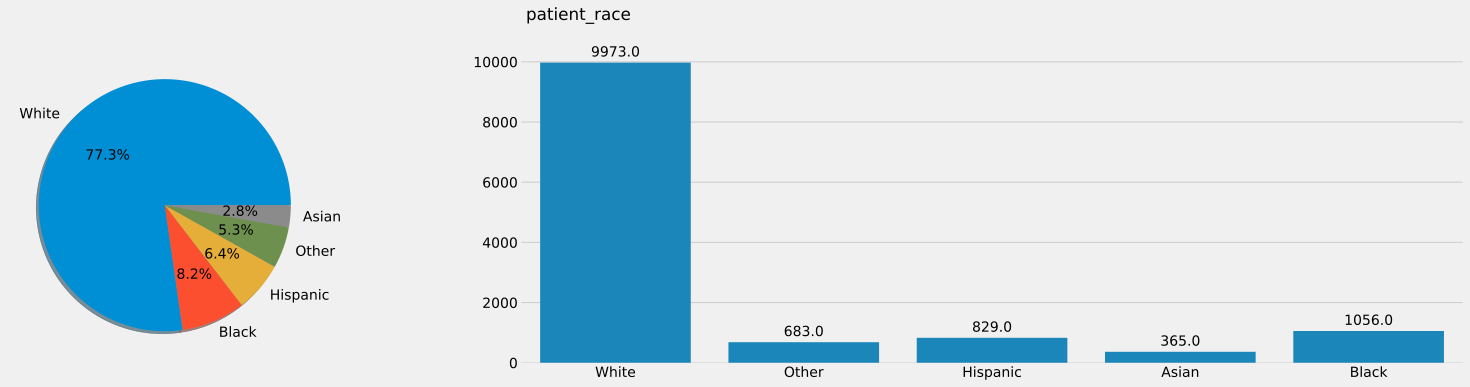

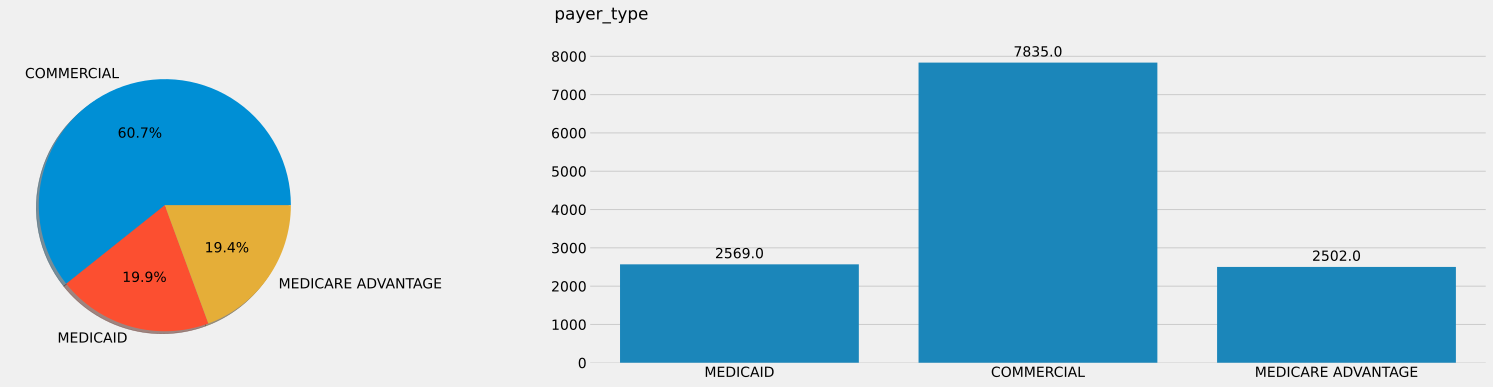

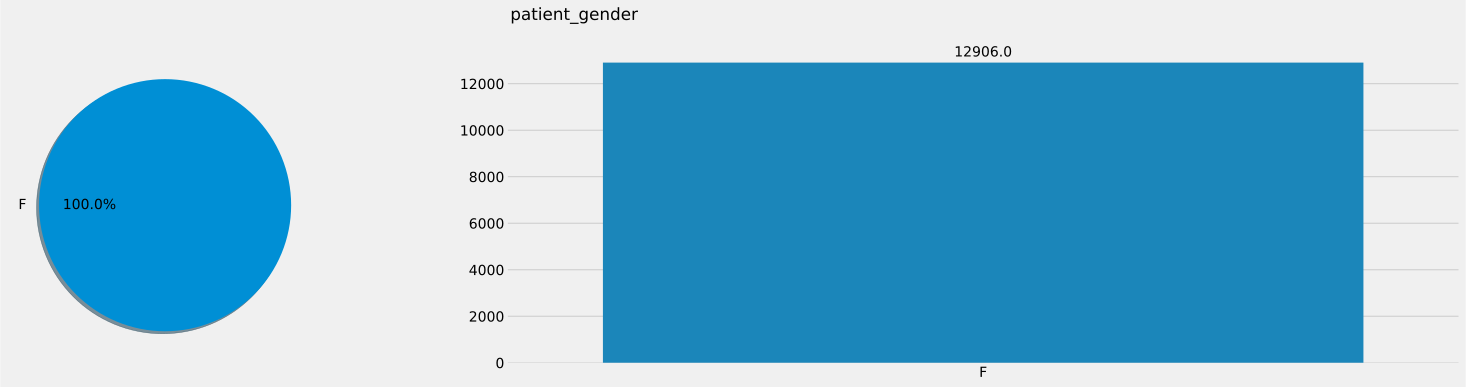

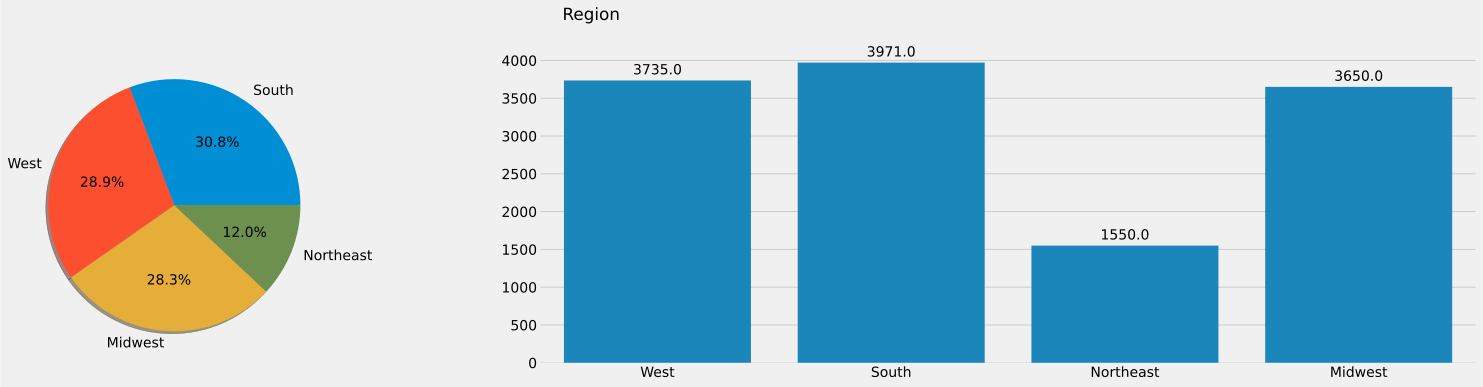

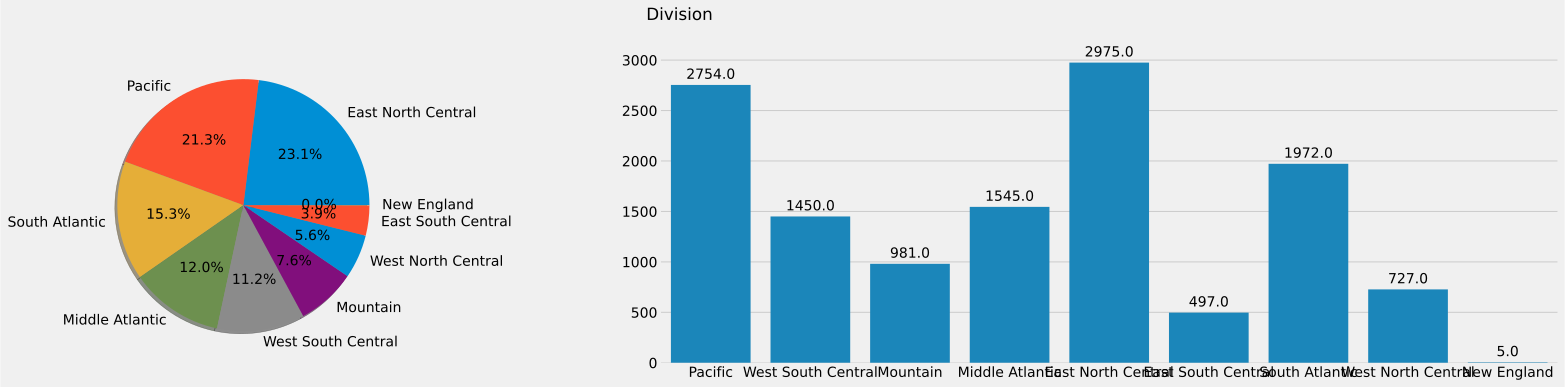

In [25]:
cat_columns = train.select_dtypes(include=['object']).drop(columns=['patient_state', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code'], axis=1)
for column in cat_columns:
    f, ax = plt.subplots(1, 2, figsize=(25, 5.5))
    train[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')
    sns.countplot(x=column, data=train, ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    total = len(train[column])
    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.suptitle(f'{column}')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

**breast cancer diagnosis desc**

In [26]:
print(train["breast_cancer_diagnosis_desc"].value_counts(sort=True))
print(train['breast_cancer_diagnosis_desc'].value_counts(normalize=True,sort=True))

Malignant neoplasm of breast (female), unspecified                  1982
Malignant neoplasm of unsp site of right female breast              1797
Malignant neoplasm of unspecified site of left female breast        1712
Malignant neoplasm of unsp site of unspecified female breast        1467
Malig neoplm of upper-outer quadrant of right female breast          978
Malig neoplasm of upper-outer quadrant of left female breast         877
Malignant neoplasm of ovrlp sites of right female breast             491
Malignant neoplasm of ovrlp sites of left female breast              419
Malignant neoplasm of upper-outer quadrant of female breast          389
Malignant neoplasm of other specified sites of female breast         307
Malig neoplasm of upper-inner quadrant of left female breast         293
Malig neoplm of upper-inner quadrant of right female breast          276
Malig neoplm of lower-outer quadrant of right female breast          213
Malignant neoplasm of central portion of left femal

In [27]:
# Converting to dummy
train=convert_dummy(train,"breast_cancer_diagnosis_desc")
train.head()

,patient_race,payer_type,patient_state,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer

**metastatic cancer diagnosis code**

In [28]:
print(train["metastatic_cancer_diagnosis_code"].value_counts(sort=True))
print(train['metastatic_cancer_diagnosis_code'].value_counts(normalize=True,sort=True))

C773     7052
C7951    1842
C779      764
C7981     467
C7800     414
C787      362
C7989     344
C799      282
C7931     282
C792      166
C771      156
C7801     149
C770      126
C782       81
C778       77
C7802      73
C786       43
C7952      32
C781       31
C772       27
C785       16
C7960      16
C7949      15
C775       13
C7982      12
C7889      12
C7970       8
C7940       7
C7932       7
C784        6
C7911       5
C774        3
C7961       3
C7900       2
C7880       2
C7901       2
C7972       1
C7910       1
C7839       1
C7962       1
C7971       1
C7830       1
C7919       1
Name: metastatic_cancer_diagnosis_code, dtype: int64
C773     0.546413
C7951    0.142724
C779     0.059197
C7981    0.036185
C7800    0.032078
C787     0.028049
C7989    0.026654
C799     0.021850
C7931    0.021850
C792     0.012862
C771     0.012087
C7801    0.011545
C770     0.009763
C782     0.006276
C778     0.005966
C7802    0.005656
C786     0.003332
C7952    0.002479
C781     0.002402
C77

In [29]:
# Converting to dummy
train=convert_dummy(train,"metastatic_cancer_diagnosis_code")
train.head()

,patient_race,payer_type,patient_state,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplas

**Region**

In [30]:
print(train["Region"].value_counts(sort=True))
print(train['Region'].value_counts(normalize=True,sort=True))

South        3971
West         3735
Midwest      3650
Northeast    1550
Name: Region, dtype: int64
South        0.307686
West         0.289400
Midwest      0.282814
Northeast    0.120099
Name: Region, dtype: float64


In [31]:
# Converting to dummy
train=convert_dummy(train,"Region")
train.head()

,patient_race,payer_type,patient_state,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of ni

**Division**

In [32]:
print(train["Division"].value_counts(sort=True))
print(train['Division'].value_counts(normalize=True,sort=True))

East North Central    2975
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: Division, dtype: int64
East North Central    0.230513
Pacific               0.213389
South Atlantic        0.152797
Middle Atlantic       0.119712
West South Central    0.112351
Mountain              0.076011
West North Central    0.056330
East South Central    0.038509
New England           0.000387
Name: Division, dtype: float64


In [33]:
# Converting to dummy
train=convert_dummy(train,"Division")
train.head()

,patient_race,payer_type,patient_state,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and 

**breast cancer diagnosis code**

In [34]:
print(train["breast_cancer_diagnosis_code"].value_counts(sort=True))
print(train['breast_cancer_diagnosis_code'].value_counts(normalize=True,sort=True))

1749      1982
C50911    1797
C50912    1712
C50919    1467
C50411     978
C50412     877
C50811     491
C50812     419
1744       389
1748       307
C50212     293
C50211     276
C50511     213
C50112     209
C50111     208
C50512     176
C50312     159
C50311     138
C50011     108
C50012     105
1742        98
1741        88
1745        71
C50819      54
C50419      48
C5091       37
1743        34
C50612      29
C50611      25
C50319      16
C50019      13
1746        12
C50219      11
C50119      11
C5041        9
19881        9
C5081        8
C50519       8
C5021        3
C509         3
C50929       3
C50619       3
C5011        2
C50021       1
C5031        1
C5051        1
C50          1
1759         1
C5001        1
C50421       1
Name: breast_cancer_diagnosis_code, dtype: int64
1749      0.153572
C50911    0.139238
C50912    0.132651
C50919    0.113668
C50411    0.075779
C50412    0.067953
C50811    0.038044
C50812    0.032466
1744      0.030141
1748      0.023787
C50212    0

In [35]:
# Converting to dummy
train=convert_dummy(train,"breast_cancer_diagnosis_code")
train.head()

,patient_race,payer_type,patient_state,patient_age,patient_gender,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast","b

**Patient state**

In [36]:
print(train["patient_state"].value_counts(sort=True))
print(train['patient_state'].value_counts(normalize=True,sort=True))

CA    2489
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: patient_state, dtype: int64
CA    0.192856
TX    0.089493
NY    0.080660
MI    0.066481
IL    0.060592
OH    0.058422
FL    0.047187
GA    0.042693
PA    0.037424
MN    0.029211
CO    0.028746
VA    0.028281
IN    0.024562
KY    0.020068
AZ    0.017744
WI    0.016426
WA    0.015497
NC    0.014412
MO    0.012397
NM    0.010925
LA    0.010770
TN    0.008678
SC    0.008523
ID    0.007206
OK    0.007206
OR    0.006896
IA    0.006664
MS    0.005

In [37]:
# Converting to dummy
train=convert_dummy(train,"patient_state")
train.head()

,patient_race,payer_type,patient_age,patient_gender,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast","breast_cancer_d

**payer** **type**

In [38]:
print(train["payer_type"].value_counts(sort=True))
print(train['payer_type'].value_counts(normalize=True,sort=True))

COMMERCIAL            7835
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: payer_type, dtype: int64
COMMERCIAL            0.607082
MEDICAID              0.199055
MEDICARE ADVANTAGE    0.193863
Name: payer_type, dtype: float64


In [39]:
# Converting to dummy
train=convert_dummy(train,"payer_type")
train.head()

,patient_race,patient_age,patient_gender,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast","breast_cancer_diagnosis_de

#### **Patient** **race**

In [40]:
print(train["patient_race"].value_counts(sort=True))
print(train['patient_race'].value_counts(normalize=True,sort=True))

White       9973
Black       1056
Hispanic     829
Other        683
Asian        365
Name: patient_race, dtype: int64
White       0.772741
Black       0.081822
Hispanic    0.064234
Other       0.052921
Asian       0.028281
Name: patient_race, dtype: float64


In [41]:
# Converting to dummy
train=convert_dummy(train,"patient_race")
train.head()

,patient_age,patient_gender,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast","breast_cancer_diagnosis_desc_Malignant 

### DATA SPLITTING

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['DiagPeriodL90D','patient_gender'],axis=1),train['DiagPeriodL90D'],
                                                    stratify=train['DiagPeriodL90D'], test_size=0.3,
                                                    random_state = 10086)

## Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.

In [43]:
y_train = y_train.astype('int')
class_distribution_before = y_train.value_counts()
X_balance,Y_balance = SMOTE().fit_resample(X_train,y_train)
y_series = pd.Series(Y_balance)
class_distribution_after = y_series.value_counts()
X_balance = pd.DataFrame(X_balance, columns = X_train.columns)
X_balance.head()

,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of right male breast,breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of unsp female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast,breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of axillary tail of unsp female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast,breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site,"breast_cancer_diagnosis_desc_Malignant neoplasm of breast of unspecified site, female","breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast,breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of unsp female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female",breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast,"breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast","breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola,

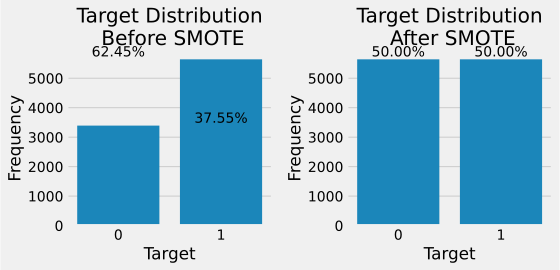

Class distribution before SMOTE:
1    5642
0    3392
Name: DiagPeriodL90D, dtype: int64

Class distribution after SMOTE:
1    5642
0    5642
Name: DiagPeriodL90D, dtype: int64


In [44]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=class_distribution_before.index, y=class_distribution_before.values)
plt.title('Target Distribution\n Before SMOTE')
plt.xlabel('Target')
plt.ylabel('Frequency')
total_before = class_distribution_before.sum()
for i, v in enumerate(class_distribution_before):
    pct = (v / total_before) * 100
    plt.text(i, v, f'{pct:.2f}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values)
plt.title('Target Distribution\n After SMOTE')
plt.xlabel('Target')
plt.ylabel('Frequency')
total_after = class_distribution_after.sum()
for i, v in enumerate(class_distribution_after):
    pct = (v / total_after) * 100
    plt.text(i, v, f'{pct:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()

print("Class distribution before SMOTE:")
print(class_distribution_before)
print("\nClass distribution after SMOTE:")
print(class_distribution_after)

<h2>Building classification models</h2>

The models will include the following:<br>
* Logistic Regression
* Decision tree
* Random forests
* LightGBM
* XG-Boost
* SVM
* KNeighbours classifier

For tunning parameters follow this link
<a href="http://topepo.github.io/caret/available-models.html">TUNNING PARAMETERS GUIDE<\a>

Accuracy Score is 0.62448
Precision Score: 0.6244834710743802
Recall Score: 1.0
F1 Score: 0.7688394276629571
ROC-AUC Score: 0.5
   0     1
0  0  1454
1  0  2418
[[0. 1.]
 [0. 1.]]


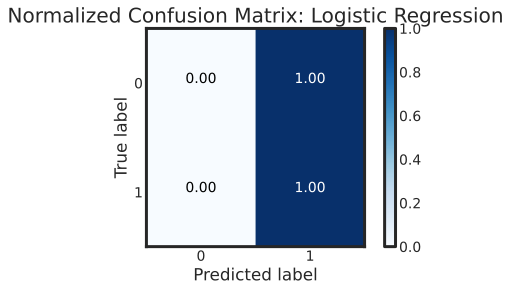

In [45]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
coef = model.coef_[0]
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coef})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score:', precision_score(y_test, y_predict))
print('Recall Score:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('ROC-AUC Score:', roc_auc_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
sns.set_style('white')
class_names = ['0','1']
plt.figure(figsize=(6, 4))
plot_confusion_matrix(confusion_matrix(y_test, y_predict),
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: Logistic Regression')
plt.show()


# Decision Tree

Accuracy Score is 0.71772
Precision Score: 0.7798901563160119
Recall Score: 0.7634408602150538
F1 Score: 0.7715778474399164
ROC-AUC Score: 0.7025594947567704
     0     1
0  933   521
1  572  1846
[[0.64167813 0.35832187]
 [0.23655914 0.76344086]]


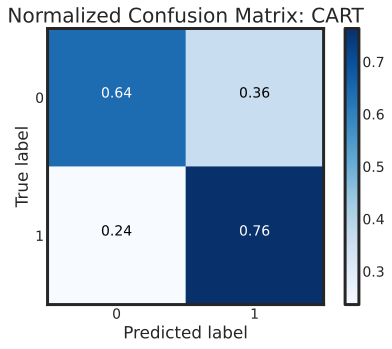

In [46]:

model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

feature_importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score:', precision_score(y_test, y_predict))
print('Recall Score:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('ROC-AUC Score:', roc_auc_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix: CART')

feature_importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

## Random Forest Classifier

Accuracy Score is 0.69421
Precision Score: 0.6760844748858448
Recall Score: 0.9797353184449958
F1 Score: 0.8000675447483958
ROC-AUC Score: 0.599565045742443
     0     1
0  319  1135
1   49  2369
[[0.21939477 0.78060523]
 [0.02026468 0.97973532]]


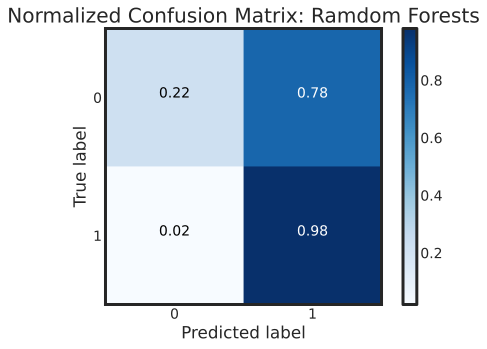

In [47]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
feature_importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score:', precision_score(y_test, y_predict))
print('Recall Score:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('ROC-AUC Score:', roc_auc_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix: Ramdom Forests')

## XGBClassifier

In [48]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8,
                      subsample=0.8,
                      learning_rate =0.02,
                      seed=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
feature_importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score:', precision_score(y_test, y_predict))
print('Recall Score:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('ROC-AUC Score:', roc_auc_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.79933
Precision Score: 0.7888067581837381
Recall Score: 0.9267990074441688
F1 Score: 0.8522532800912721
ROC-AUC Score: 0.7570721309572975
     0     1
0  854   600
1  177  2241


In [49]:
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score:', precision_score(y_test, y_predict))
print('Recall Score:', recall_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))
print('ROC-AUC Score:', roc_auc_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.62448
Precision Score: 0.6244834710743802
Recall Score: 1.0
F1 Score: 0.7688394276629571
ROC-AUC Score: 0.5
   0     1
0  0  1454
1  0  2418


In [50]:
from pycaret.classification import *
model_setup = setup(train , target = 'DiagPeriodL90D' , train_size=0.75)

,Description,Value
0,Session id,4479
1,Target,DiagPeriodL90D
2,Target type,Binary
3,Original data shape,"(12906, 277)"
4,Transformed data shape,"(12906, 277)"
5,Transformed train set shape,"(9679, 277)"
6,Transformed test set shape,"(3227, 277)"
7,Numeric features,275
8,Categorical features,1
9,Preprocess,True


In [51]:
# model training and selection
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:43:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8085,0.0000,0.9621,0.7817,0.8625,0.5576,0.5916,0.4190
lda,Linear Discriminant Analysis,0.8083,0.0000,0.9620,0.7817,0.8624,0.5574,0.5913,0.7890
ada,Ada Boost Classifier,0.8028,0.0000,0.9426,0.7849,0.8565,0.5493,0.5736,2.2640
lightgbm,Light Gradient Boosting Machine,0.7935,0.0000,0.9219,0.7850,0.8479,0.5325,0.5498,9.8530
gbc,Gradient Boosting Classifier,0.7905,0.0000,0.9234,0.7811,0.8463,0.5244,0.5431,10.1380
xgboost,Extreme Gradient Boosting,0.7777,0.0000,0.8902,0.7834,0.8333,0.5035,0.5132,2.0440
et,Extra Trees Classifier,0.7434,0.0000,0.8332,0.7734,0.8022,0.4383,0.4410,4.2050
rf,Random Forest Classifier,0.7292,0.0000,0.8162,0.7657,0.7901,0.4096,0.4114,4.8570
dt,Decision Tree Classifier,0.6886,0.0000,0.7375,0.7576,0.7473,0.3418,0.3422,1.2280
svm,SVM - Linear Kernel,0.6245,0.0000,1.0000,0.6245,0.7689,0.0000,0.0000,1.3520


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8085,0.0000,0.9621,0.7817,0.8625,0.5576,0.5916,0.4190
lda,Linear Discriminant Analysis,0.8083,0.0000,0.9620,0.7817,0.8624,0.5574,0.5913,0.7890
ada,Ada Boost Classifier,0.8028,0.0000,0.9426,0.7849,0.8565,0.5493,0.5736,2.2640
catboost,CatBoost Classifier,0.7990,0.0000,0.9373,0.7835,0.8535,0.5416,0.5645,26.5340
lightgbm,Light Gradient Boosting Machine,0.7935,0.0000,0.9219,0.7850,0.8479,0.5325,0.5498,9.8530
gbc,Gradient Boosting Classifier,0.7905,0.0000,0.9234,0.7811,0.8463,0.5244,0.5431,10.1380
xgboost,Extreme Gradient Boosting,0.7777,0.0000,0.8902,0.7834,0.8333,0.5035,0.5132,2.0440
et,Extra Trees Classifier,0.7434,0.0000,0.8332,0.7734,0.8022,0.4383,0.4410,4.2050
rf,Random Forest Classifier,0.7292,0.0000,0.8162,0.7657,0.7901,0.4096,0.4114,4.8570
dt,Decision Tree Classifier,0.6886,0.0000,0.7375,0.7576,0.7473,0.3418,0.3422,1.2280


In [52]:
best_model=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8037,0.0000,0.9620,0.7770,0.8597,0.5452,0.5808
1,0.8068,0.0000,0.9620,0.7802,0.8616,0.5532,0.5875
2,0.8058,0.0000,0.9769,0.7725,0.8628,0.5456,0.5916
3,0.8171,0.0000,0.9587,0.7923,0.8676,0.5806,0.6088
4,0.7934,0.0000,0.9421,0.7755,0.8507,0.5252,0.5522
5,0.8223,0.0000,0.9702,0.7919,0.8720,0.5910,0.6246
6,0.8017,0.0000,0.9619,0.7747,0.8582,0.5407,0.5771
7,0.8058,0.0000,0.9636,0.7781,0.8609,0.5508,0.5866
8,0.8120,0.0000,0.9669,0.7828,0.8652,0.5657,0.6012


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
tuned_model = tune_model(best_model)
final_model = finalize_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8037,0.0000,0.9620,0.7770,0.8597,0.5452,0.5808
1,0.8068,0.0000,0.9620,0.7802,0.8616,0.5532,0.5875
2,0.8058,0.0000,0.9769,0.7725,0.8628,0.5456,0.5916
3,0.8182,0.0000,0.9603,0.7926,0.8685,0.5827,0.6115
4,0.7934,0.0000,0.9421,0.7755,0.8507,0.5252,0.5522
5,0.8223,0.0000,0.9702,0.7919,0.8720,0.5910,0.6246
6,0.8017,0.0000,0.9619,0.7747,0.8582,0.5407,0.5771
7,0.8048,0.0000,0.9619,0.7778,0.8601,0.5487,0.5838
8,0.8130,0.0000,0.9685,0.7831,0.8660,0.5678,0.6041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


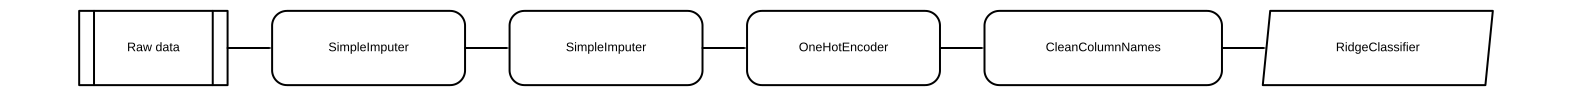

In [54]:
evaluate_model(final_model)